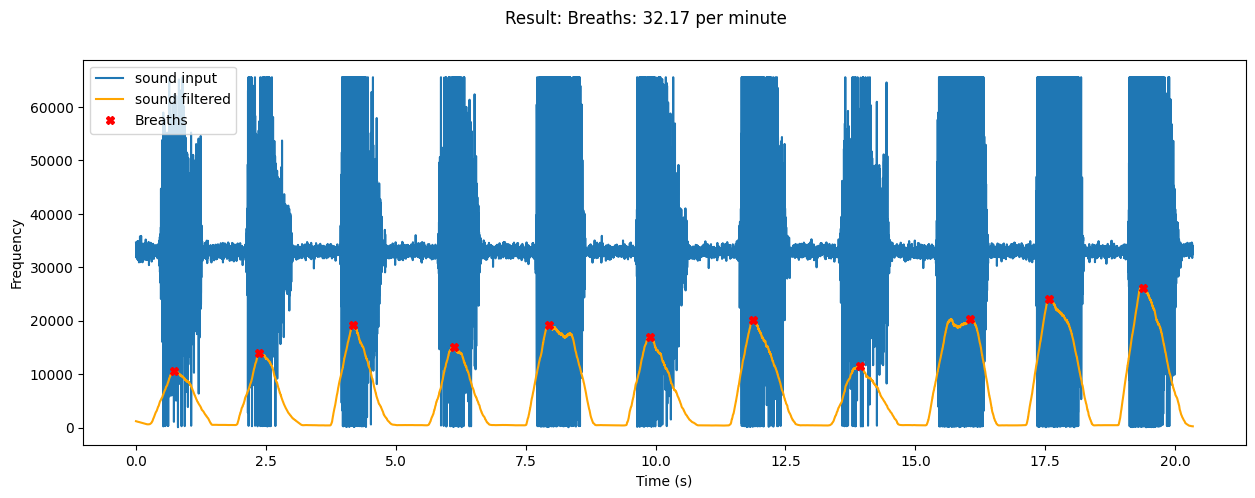

In [5]:
import pandas as pd
from scipy import signal
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import numpy as np

# Read file
data = pd.read_csv('v3_atmung_2.csv')

# Werte aus der CSV-Datei extrahieren
d_values = data['D']

# Künstliche Zeitreihe erstellen
time_series = np.arange(len(data)) * 0.001  # 1 Millisekunden pro Eintrag

# Beispiel für Anomalieerkennung (Schwellenwert: 2 Standardabweichungen)
mittelwert = np.mean(d_values)
anomalien = [index for index, freq in enumerate(d_values) if abs(freq - mittelwert)]

diffMittel = abs(d_values - mittelwert)

#Filterung der Daten
sgf = signal.savgol_filter(diffMittel, window_length=400, polyorder=1, mode="nearest")
peaks, _ = find_peaks(sgf,  height=5000, distance=1000)

# Zeitdifferenzen zwischen aufeinanderfolgenden Peaks auf der künstlichen Zeitreihe berechnen
time_diffs = np.diff(time_series[peaks])

# Atemzüge pro Minute berechnen
breaths = 60 / np.mean(time_diffs)

# Create a figure and set its size to 15x5 in.
fig, ax2 = plt.subplots(figsize=(15,5))
fig.suptitle(f'Result: Breaths: {breaths:.2f} per minute')

# Plot a line chart
ax2.plot(time_series, d_values, label='sound input')
ax2.plot(time_series, sgf, label='sound filtered', color="orange")
ax2.plot(time_series[peaks], sgf[peaks], 'X', label='Breaths', color='red')

ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency')
ax2.legend()

# Show plot
plt.show()

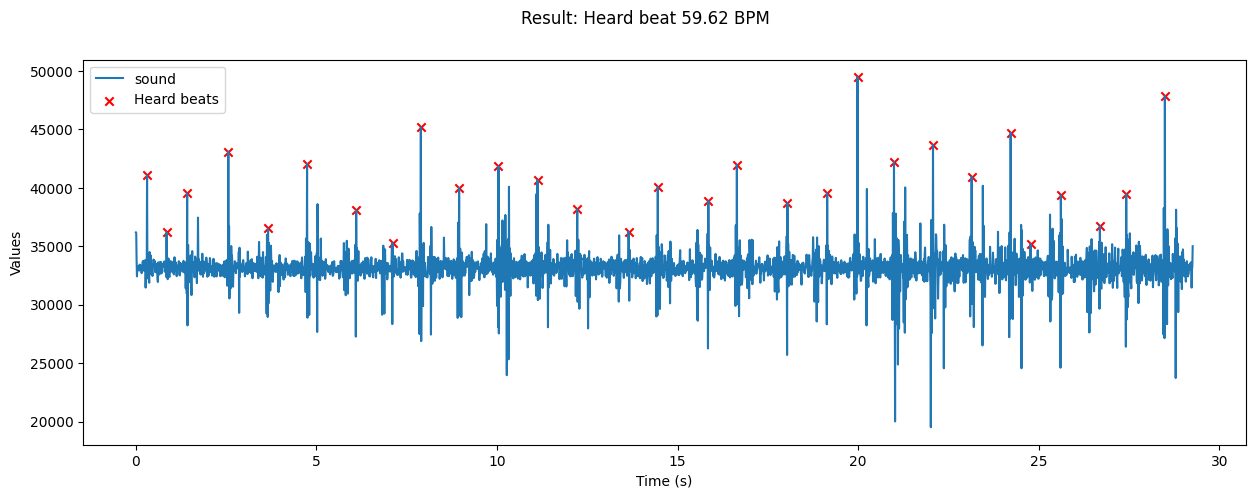

In [6]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Read file
data = pd.read_csv('v3_herz_ohne_Atmung_4.csv')

#Werte aus der CSV-Datei extrahieren
d_values = data['D']

# Künstliche Zeitreihe erstellen
time_series = np.arange(len(data)) * 0.01  # 10 Millisekunden pro Eintrag

# Peaks in den Werten finden
peaks, _ = find_peaks(d_values, height=35000, distance=50)

# Zeitdifferenzen zwischen aufeinanderfolgenden Peaks auf der künstlichen Zeitreihe berechnen
time_diffs = np.diff(time_series[peaks])

# Herzschlagfrequenz in BPM (Beats Per Minute) berechnen
heartbeats = 60 / np.mean(time_diffs)

# Plot erstellen
fig, ax1 = plt.subplots(figsize=(15,5))
fig.suptitle(f'Result: Heard beat {heartbeats:.2f} BPM')

ax1.plot(time_series, d_values, label='sound')
ax1.scatter(time_series[peaks], d_values.iloc[peaks], c='r', marker='x', label='Heard beats')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Values')
ax1.legend()

# Diagramm anzeigen
plt.show()